<a href="https://colab.research.google.com/github/Steel3264/AI/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from keras.utils.image_utils import load_img
from keras.utils.image_dataset import load_image
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/Money/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('5k'):
    output = 1 
  if file.startswith('10k'):
    output = 2
  if file.startswith('20k'):
    output = 3
  if file.startswith('50k'):
    output = 4
  if file.startswith('100k'):
    output = 5
  if file.startswith('100k'):
    output = 6
  if file.startswith('500k'):
    output = 7
  img = load_img(folder + file,target_size=(200,200))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('Money_photos.npy', photos)
save('Money_labels.npy', labels)

(18, 200, 200, 3) (18,)


In [14]:
import numpy as np
np.load('/content/Money_labels.npy')
np.load('/content/Money_labels.npy')

array([1., 1., 2., 2., 4., 4., 6., 6., 7., 7., 3., 2., 1., 1., 0., 2., 3.,
       0.])

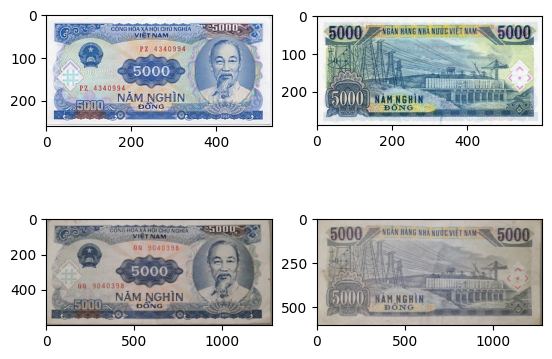

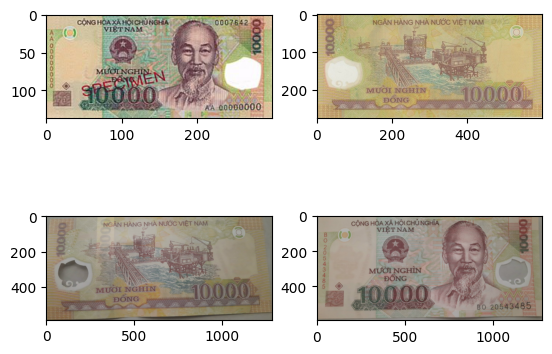

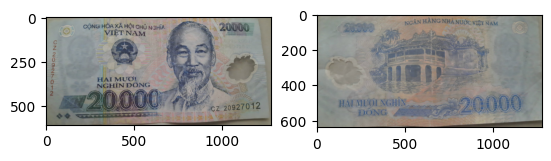

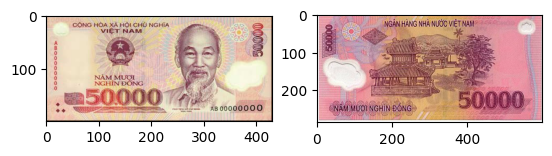

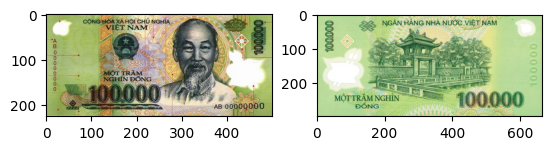

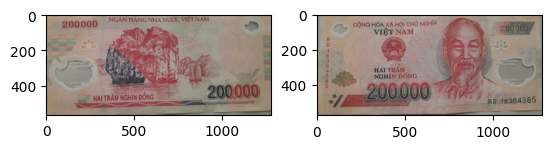

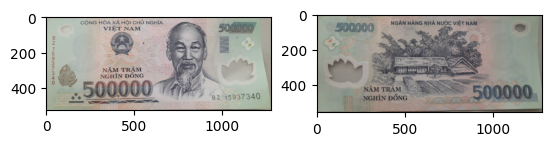

In [15]:
import matplotlib.pyplot as plt 
from matplotlib.image import imread 

folder = '/content/drive/MyDrive/Money/'
for i in range(4):
  plt.subplot(2,2,i+1)
  filename = folder + '5k'+str(i+1)+'.jpg'
  img = imread(filename) 
  plt.imshow(img)
plt.show()
for i in range(4):
  plt.subplot(2,2,i+1)
  filename = folder + '10k'+str(i+1)+'.jpg'
  img = imread(filename) 
  plt.imshow(img)
plt.show()
for i in range(2):
  plt.subplot(1,2,i+1)
  filename = folder + '20k'+str(i+1)+'.jpg'
  img = imread(filename) 
  plt.imshow(img)
plt.show()
for i in range(2):
  plt.subplot(1,2,i+1)
  filename = folder + '50k'+str(i+1)+'.jpg'
  img = imread(filename) 
  plt.imshow(img)
plt.show()
for i in range(2):
  plt.subplot(1,2,i+1)
  filename = folder + '100k'+str(i+1)+'.jpg'
  img = imread(filename) 
  plt.imshow(img)
plt.show()
for i in range(2):
  plt.subplot(1,2,i+1)
  filename = folder + '200k'+str(i+1)+'.jpg'
  img = imread(filename) 
  plt.imshow(img)
plt.show()
for i in range(2):
  plt.subplot(1,2,i+1)
  filename = folder + '500k'+str(i+1)+'.jpg'
  img = imread(filename) 
  plt.imshow(img)
plt.show()


In [21]:
import tensorflow as tf
tf.__version__

!sudo pip3 install keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, DataFrameIterator
from keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Flatten,
    BatchNormalization,
    Conv2D,
    MaxPooling2D,
    Dropout,
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
